# Prerequisites

In [2]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1. Download Dataset

In [3]:
filename = "used_cars_autoscout24.csv"
URL = "http://www.juergenbrauer.org/datasets/" + filename

# import urllib.request
# urllib.request.urlretrieve(URL, filename)

# 2. Read Data

In [4]:
import pandas
table = pandas.read_csv(filename)
table.head(5)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


# 3. Clean Data

In [5]:
table["registration_date"] = pandas.to_datetime(table["registration_date"], errors="coerce")
table["year"] = pandas.to_numeric(table["year"], errors="coerce")
table["price_in_euro"] = pandas.to_numeric(table["price_in_euro"], errors="coerce")
table["power_kw"] = pandas.to_numeric(table["power_kw"], errors="coerce")
table["power_ps"] = pandas.to_numeric(table["power_ps"], errors="coerce")
table.info()

C:\Users\chfle\AppData\Local\Temp\ipykernel_17124\60134713.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  table["registration_date"] = pandas.to_datetime(table["registration_date"], errors="coerce")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                251079 non-null  int64         
 1   brand                     251079 non-null  object        
 2   model                     251079 non-null  object        
 3   color                     250913 non-null  object        
 4   registration_date         250882 non-null  datetime64[ns]
 5   year                      250884 non-null  float64       
 6   price_in_euro             250880 non-null  float64       
 7   power_kw                  250786 non-null  float64       
 8   power_ps                  250869 non-null  float64       
 9   transmission_type         251079 non-null  object        
 10  fuel_type                 251079 non-null  object        
 11  fuel_consumption_l_100km  224206 non-null  object        
 12  fu

In [6]:
clean_data = table[["brand", "mileage_in_km", "power_ps", "price_in_euro"]]
clean_data = clean_data.dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250692 entries, 0 to 251078
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   brand          250692 non-null  object 
 1   mileage_in_km  250692 non-null  float64
 2   power_ps       250692 non-null  float64
 3   price_in_euro  250692 non-null  float64
dtypes: float64(3), object(1)
memory usage: 9.6+ MB


In [7]:
# One Hot Encoding
clean_data = pandas.get_dummies(clean_data)

# 4. Prepare Data for ML

##  4.1 Input/Output Split

In [8]:
x = clean_data.drop("price_in_euro", axis="columns")
y = clean_data[["price_in_euro"]]

In [9]:
x.shape

(250692, 49)

In [10]:
y.shape

(250692, 1)

## 4.2 Train/Test Split

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
x_train.shape

(200553, 49)

In [13]:
x_test.shape

(50139, 49)

In [14]:
y_train.shape

(200553, 1)

In [15]:
y_test.shape

(50139, 1)

## 4.3 Scaler

In [16]:
from sklearn.preprocessing import MinMaxScaler

input_scaler = MinMaxScaler()
input_scaler.fit(x_train)
x_train_scaled = input_scaler.transform(x_train)

output_scaler = MinMaxScaler()
output_scaler.fit(y_train)
y_train_scaled = output_scaler.transform(y_train)

x_test_scaled = input_scaler.transform(x_test)
y_test_scaled = output_scaler.transform(y_test)

# 5. Custom Neuronal Network

1 x1 x2 ... x49      
                        w0
                        w1
                        w2
                        ...
                        w49

act = dot(input, weights) = 1 * w0 + x1 * w1 + x2 * w2 + ... + x49 * w49

In [17]:
import numpy as np

N = x_train.shape[1] + 1 # +1 for the bias 

# Random weights
weight_vector = np.random.normal(loc=0.0, scale=1.0, size=N)
weight_vector

array([ 0.65577748,  0.65254641,  0.52591381, -0.39205493,  0.50967156,
        1.41121987, -1.04294628, -2.09813113, -0.17339057, -1.13189882,
        0.3550851 ,  1.70097056, -0.6068834 , -0.79628062, -0.27593804,
       -0.597543  , -2.01673802, -2.85407997, -0.44253783, -0.25148549,
       -0.90219611,  0.07289142, -0.05817524, -0.81666254, -0.00752998,
        1.53082473, -1.62105967,  1.23189553, -0.96824373,  0.2792577 ,
        0.92183656, -1.40675507,  0.30017539, -0.39649336,  0.62405692,
       -0.4489193 , -0.39649527, -0.87753991, -0.90114266, -1.37527137,
       -0.89646174, -1.40849673, -0.76184952, -0.13105535, -0.93634001,
        0.81847488, -0.1231139 , -2.93311468,  1.12037757, -0.16280386])

In [18]:
# Input with bias
input_vector = np.ones(N)
input_vector[1:] = x_train_scaled[0]
input_vector

array([1.        , 0.00394737, 0.45991984, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [19]:
# Activity from input and weights
activity = np.dot(weight_vector, input_vector)
activity

np.float64(-1.1165065054916046)

In [20]:
# ReLU activation function to calculate output
def relu(x):
    return np.maximum(0, x)

out = relu(activity)
out

np.float64(0.0)

# 6. Score Model

In [21]:
x_test_scaled.shape

(50139, 49)

In [22]:
def score_model():
    test_count = x_test_scaled.shape[0]

    errors = []
    for test_index in range(test_count):
        # Feedforward
        input_vector[1:] = x_test_scaled[test_index]
        activity = np.dot(input_vector, weight_vector)

        output = relu(activity)
        output_unscaled = output_scaler.inverse_transform([[output]])

        # Lerning
        target = y_test_scaled[test_index][0]
        target_unscaled = output_scaler.inverse_transform([[target]])
        
        absolute_error = abs(target_unscaled - output_unscaled)
        errors.append(absolute_error)

    average_error = np.mean(errors)
    return average_error

In [23]:
score_model()

np.float64(4676864.310920511)

# All in one

In [111]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

example_count = x_train_scaled.shape[0]
input_length = x_train_scaled.shape[1] + 1

weight_vector = np.random.normal(loc=0.0, scale=1.0, size=input_length)
input_vector = np.ones(N)

errors = []
average_errors = []

In [112]:
epoch_count = 1
learning_rate = 0.01
for epoch in range(epoch_count):
    for example_index in range(example_count):
        # Feedforward
        input_vector[1:] = x_train_scaled[example_index]
        activity = np.dot(weight_vector, input_vector)
        output = relu(activity)

        # Learning
        target = y_train_scaled[example_index][0]
        error = target - output
        
        # Perceptron learning rule
        weight_vector += learning_rate * error * input_vector

        # Calculate error
        errors.append(abs(error))
        if (example_index + 1) % 1000 == 0:
            average_errors.append(np.mean(errors))
            errors = []

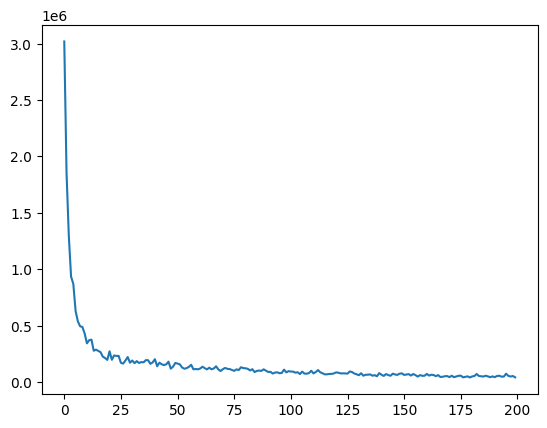

In [113]:
import matplotlib.pyplot as plt

average_errors_unscaled = output_scaler.inverse_transform(np.array(average_errors).reshape(-1, 1))

plt.plot(average_errors_unscaled)
plt.show()

In [45]:
score_model()

np.float64(7836.078462409687)

# Batch Processing

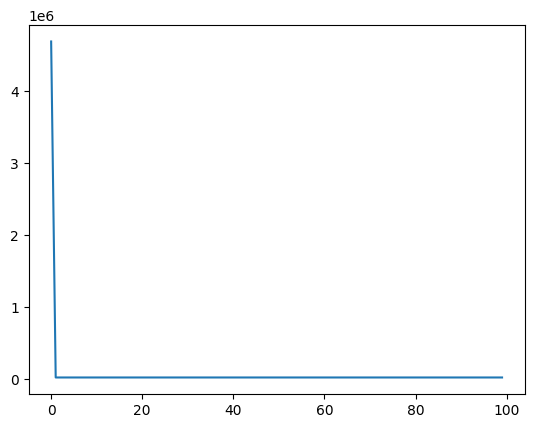

In [101]:
example_count = x_train_scaled.shape[0]
input_length = x_train_scaled.shape[1] + 1

weight_vector = np.random.normal(loc=0.0, scale=1.0, size=(input_length,))
input_vectors = np.hstack([np.ones((example_count, 1)), x_train_scaled])

targets = y_train_scaled[:, 0]

epoch_count = 100
learning_rate = 0.01

average_errors = []

for epoch in range(epoch_count):
    activity = np.dot(input_vectors, weight_vector)
    output = relu(activity)
    errors = targets - output
    weight_vector += learning_rate * np.dot(input_vectors.T, errors)

    average_errors.append(np.mean(np.abs(errors)))

import matplotlib.pyplot as plt

average_errors_unscaled = output_scaler.inverse_transform(np.array(average_errors).reshape(-1, 1))

plt.plot(average_errors_unscaled)
plt.show()